<a href="https://colab.research.google.com/github/cepdnaclk/e17-co542-facial-emotion-recognition-in-proctored-environment/blob/main/NNProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import os
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfpl = tfp.layers

plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"drmadhushan","key":"34b5e9d6d102663a0f3e82018f08f7dc"}'}

In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [5]:
!kaggle datasets download -d aadityasinghal/facial-expression-dataset

facial-expression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('facial-expression-dataset.zip', 'r')
zip_ref.extractall('/')
zip_ref.close()

In [7]:
TRAIN_DIR ='/train/train/'
TEST_DIR = '/test/test/'

In [8]:
def load_images(dir_path):
    labels = []
    img_paths = []

    for folder in os.listdir(dir_path):
        for filename in os.listdir(dir_path+folder):
            img_path = os.path.join(dir_path,folder,filename)
            img_paths.append(img_path)
            labels.append(folder)
        print(folder,' Completed')
    return img_paths, labels

In [9]:
train = pd.DataFrame()
train['images'], train['labels'] = load_images(TRAIN_DIR)

angry  Completed
neutral  Completed
disgust  Completed
sad  Completed
fear  Completed
happy  Completed
surprise  Completed


In [10]:
train = train.sample(frac = 1).reset_index(drop=True)
train.head()

,images,labels
0,/train/train/fear/Training_21237020.jpg,fear
1,/train/train/surprise/Training_47558346.jpg,surprise
2,/train/train/sad/Training_39308156.jpg,sad
3,/train/train/sad/Training_62727458.jpg,sad
4,/train/train/happy/Training_49111677.jpg,happy


In [11]:
test = pd.DataFrame()
test['images'], test['labels'] = load_images(TEST_DIR)
test.head()

angry  Completed
neutral  Completed
disgust  Completed
sad  Completed
fear  Completed
happy  Completed
surprise  Completed


,images,labels
0,/test/test/angry/PrivateTest_61043821.jpg,angry
1,/test/test/angry/PrivateTest_45664220.jpg,angry
2,/test/test/angry/PrivateTest_33746988.jpg,angry
3,/test/test/angry/PublicTest_47760796.jpg,angry
4,/test/test/angry/PrivateTest_77446000.jpg,angry


<Axes: xlabel='labels', ylabel='count'>

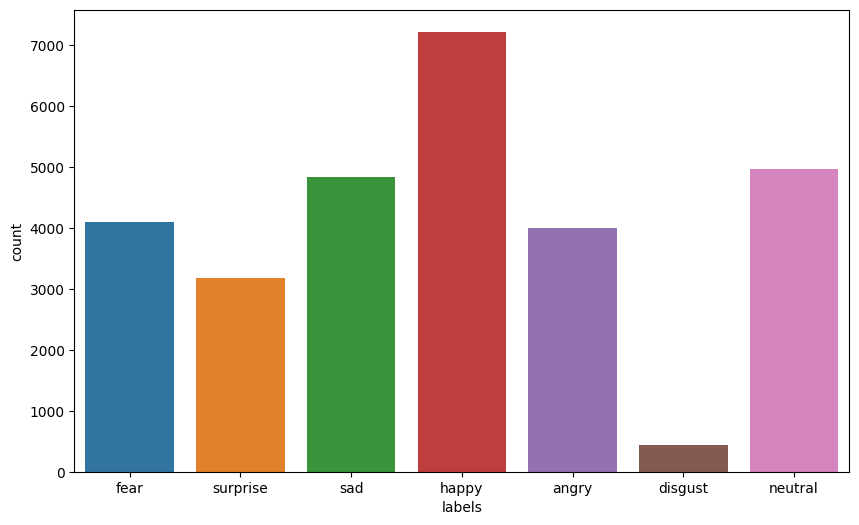

In [12]:
sns.countplot(data=train, x='labels')

In [13]:
def read_images(images):
    features=[]
    for img_path in tqdm(images):
        img = load_img(img_path,grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [14]:
X_train = read_images(train['images'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [15]:
X_test = read_images(test['images'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [16]:
X_train = X_train/255.0
X_test = X_test/255.0

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['labels'])
y_train = le.transform(train['labels'])
y_test = le.transform(test['labels'])

In [18]:
'''from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)'''

'from keras.utils import to_categorical\ny_train = to_categorical(y_train, num_classes=7)\ny_test = to_categorical(y_test, num_classes=7)'

In [19]:
y_train[0]

2

In [20]:
def get_deterministic_model(input_shape, loss, optimizer, metrics):
    """
    This function should build and compile a CNN model according to the above specification.
    The function takes input_shape, loss, optimizer and metrics as arguments, which should be
    used to define and compile the model.
    Your function should return the compiled model.
    """
    '''model = Sequential([
        Conv2D(kernel_size=(5, 5), filters=8, activation='relu', padding='VALID', input_shape=input_shape),
        MaxPooling2D(pool_size=(6, 6)),
        Flatten(),
        Dense(units=10, activation='softmax')
    ])'''
    model = Sequential()
    # convolutional layers
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    # model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.4))

    # model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.4))

    # model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.4))

    model.add(Flatten())
    # fully connected layers
    # model.add(Dense(512, activation='relu'))
    # model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    # output layer
    model.add(Dense(units=7, activation='softmax'))

    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

In [21]:
tf.random.set_seed(0)
deterministic_model = get_deterministic_model(
    input_shape=(48, 48, 1),
    loss=SparseCategoricalCrossentropy(),
    optimizer=RMSprop(),
    metrics=['accuracy']
)

In [22]:
deterministic_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 flatten (Flatten)           (None, 67712)             0         
                                                                 
 dense (Dense)               (None, 256)               17334528  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [ ]:
history = deterministic_model.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
225/225 [==============================] - 294s 1s/step - loss: 1.8520 - accuracy: 0.2637 - val_loss: 1.7655 - val_accuracy: 0.3211
Epoch 2/50
225/225 [==============================] - 297s 1s/step - loss: 1.6262 - accuracy: 0.3656 - val_loss: 1.5438 - val_accuracy: 0.4016
Epoch 3/50
225/225 [==============================] - 302s 1s/step - loss: 1.5358 - accuracy: 0.4067 - val_loss: 1.4793 - val_accuracy: 0.4256
Epoch 4/50
225/225 [==============================] - 304s 1s/step - loss: 1.4722 - accuracy: 0.4323 - val_loss: 1.5604 - val_accuracy: 0.4193
Epoch 5/50
225/225 [==============================] - 304s 1s/step - loss: 1.4211 - accuracy: 0.4593 - val_loss: 1.4246 - val_accuracy: 0.4452
Epoch 6/50
225/225 [==============================] - 295s 1s/step - loss: 1.3727 - accuracy: 0.4769 - val_loss: 1.4588 - val_accuracy: 0.4365
Epoch 7/50
225/225 [==============================] - 294s 1s/step - loss: 1.3265 - accuracy: 0.4950 - val_loss: 1.3906 - val_accuracy: 0.4631

In [ ]:
print('Accuracy on test set: ',
      str(history.evaluate(X_test, y_test, verbose=False)[1]))

Accuracy on test set:  0.14641961455345154


In [ ]:
def get_probabilistic_model(input_shape, loss, optimizer, metrics):
    """
    This function should return the probabilistic model according to the
    above specification.
    The function takes input_shape, loss, optimizer and metrics as arguments, which should be
    used to define and compile the model.
    Your function should return the compiled model.
    """
    '''model = Sequential()
    # convolutional layers
    model.add(Conv2D(128, kernel_size=(3,3), padding='VALID', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    # fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(tfpl.OneHotCategorical.params_size(10)))
    model.add(tfpl.OneHotCategorical(10, convert_to_tensor_fn=tfd.Distribution.mode))
    '''
    model = Sequential([
        Conv2D(kernel_size=(3, 3), filters=8, activation='relu', padding='VALID', input_shape=input_shape),
        MaxPooling2D(pool_size=(6, 6)),
        Flatten(),
        Dense(tfpl.OneHotCategorical.params_size(7)),
        tfpl.OneHotCategorical(10, convert_to_tensor_fn=tfd.Distribution.mode)
    ])

    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

In [ ]:
def nll(y_true, y_pred):
    return -y_pred.log_prob(y_true)

In [ ]:
tf.random.set_seed(0)
probabilistic_model = get_probabilistic_model(
    input_shape=(48, 48, 1),
    loss=nll,
    optimizer=RMSprop(),
    metrics=['accuracy']
)

In [ ]:
y_train_oh = tf.keras.utils.to_categorical(y_train,num_classes=7)
y_test_oh = tf.keras.utils.to_categorical(y_test,num_classes=7)

In [ ]:
history = probabilistic_model.fit(x=X_train, y=y_train_oh, batch_size=128, epochs=50, validation_data=(X_test, y_test_oh))

Epoch 1/5
225/225 [==============================] - 18s 76ms/step - loss: 1.7909 - accuracy: 0.2625 - val_loss: 1.7609 - val_accuracy: 0.2820
Epoch 2/5
225/225 [==============================] - 17s 74ms/step - loss: 1.7253 - accuracy: 0.3074 - val_loss: 1.7037 - val_accuracy: 0.3242
Epoch 3/5
225/225 [==============================] - 19s 85ms/step - loss: 1.6789 - accuracy: 0.3429 - val_loss: 1.6623 - val_accuracy: 0.3527
Epoch 4/5
225/225 [==============================] - 17s 75ms/step - loss: 1.6448 - accuracy: 0.3627 - val_loss: 1.6453 - val_accuracy: 0.3640
Epoch 5/5
225/225 [==============================] - 17s 76ms/step - loss: 1.6181 - accuracy: 0.3779 - val_loss: 1.6121 - val_accuracy: 0.3799


In [ ]:
print('Accuracy on test set: ',
      str(probabilistic_model.evaluate(X_test, y_test_oh, verbose=False)[1]))


Accuracy on test set:  0.37991082668304443


In [ ]:
def analyse_model_prediction(data, true_labels, model, image_num, run_ensemble=False):
    if run_ensemble:
        ensemble_size = 200
    else:
        ensemble_size = 1
    image = data[image_num]
    true_label = true_labels[image_num]
    predicted_probabilities = np.empty(shape=(ensemble_size, 7))
    for i in range(ensemble_size):
        predicted_probabilities[i] = model(image[np.newaxis, :]).mean().numpy()[0]
    model_prediction = model(image[np.newaxis, :])
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 2),
                                   gridspec_kw={'width_ratios': [2, 4]})

    # Show the image and the true label
    ax1.imshow(image[..., 0], cmap='gray')
    ax1.axis('off')
    ax1.set_title('True label: {}'.format(str(true_label)))

    # Show a 95% prediction interval of model predicted probabilities
    pct_2p5 = np.array([np.percentile(predicted_probabilities[:, i], 2.5) for i in range(7)])
    pct_97p5 = np.array([np.percentile(predicted_probabilities[:, i], 97.5) for i in range(7)])
    bar = ax2.bar(np.arange(7), pct_97p5, color='red')
    bar[int(true_label)].set_color('green')
    ax2.bar(np.arange(7), pct_2p5-0.02, color='white', linewidth=1, edgecolor='white')
    ax2.set_xticks(np.arange(7))
    ax2.set_ylim([0, 1])
    ax2.set_ylabel('Probability')
    ax2.set_title('Model estimated probabilities')
    plt.show()

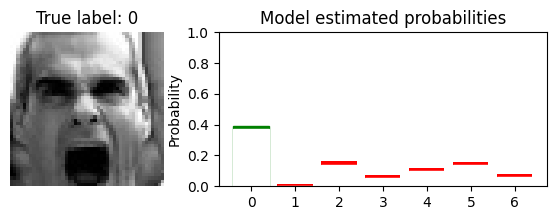

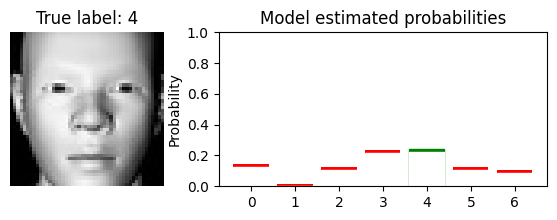

In [ ]:
for i in [0, 1577]:
    analyse_model_prediction(X_test, y_test, probabilistic_model, i)

In [ ]:
emotions = ['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy', 'surprise']